In [1]:
from fer import Video, FER
import pandas as pd
import os
import speech_recognition as sr
from pydub import AudioSegment
from pydub.silence import split_on_silence
import shutil
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
#requires creating  folders : videos, results[audio,data,text]

Instructions for updating:
non-resource variables are not supported in the long term


In [2]:
data_emotion=pd.DataFrame(columns=['name','video','text','audio'])
names=[]
videos=[]
texts=[]
audios=[]

# Analyzing sound

In [3]:
def get_large_audio_transcription(path,language='en'):
    """
    Splitting the large audio file into chunks
    and apply speech recognition on each of these chunks
    """
    r = sr.Recognizer()
    # open the audio file using pydub
    sound = AudioSegment.from_wav(path)  
    # split audio sound where silence is 700 miliseconds or more and get chunks
    chunks = split_on_silence(sound,
        # experiment with this value for your target audio file
        min_silence_len = 500,
        # adjust this per requirement
        silence_thresh = sound.dBFS-14,
        # keep the silence for 1 second, adjustable as well
        keep_silence=500,
    )
    folder_name = "audio-chunks"
    # create a directory to store the audio chunks
    if not os.path.isdir(folder_name):
        os.mkdir(folder_name)
    whole_text = ""
    # process each chunk 
    for i, audio_chunk in enumerate(chunks, start=1):
        # export audio chunk and save it in
        # the `folder_name` directory.
        chunk_filename = os.path.join(folder_name, f"chunk{i}.wav")
        audio_chunk.export(chunk_filename, format="wav")
        # recognize the chunk
        with sr.AudioFile(chunk_filename) as source:
            audio_listened = r.record(source)
            # try converting it to text
            try:
                text = r.recognize_google(audio_listened,language=language)
            except sr.UnknownValueError as e:
                #print("Error:", str(e))
                continue
            else:
                text = f"{text.capitalize()}. "
                print(chunk_filename, ":", text)
                whole_text += text
    # return the text for all chunks detected
    shutil.rmtree('audio-chunks', ignore_errors=True)
    return whole_text

# Converting videos to sound and text, analyzing emotions from pictures to a csv file using FER (Face emotion recognition by Keras)

In [4]:

arr = os.listdir('videos')
print(arr)

for f in arr:
    name=f[:f.rindex('.')]
    print(name)
    
    names.append(name)
    command2wav = "ffmpeg -i videos\\" +name+".mp4 -ac 1  results\\audio\\"+name+".wav"
    os.system(command2wav)
    video_filename = "videos\\"+name+".mp4"

    video = Video(video_filename)
    # Analyze video, displaying the output
    detector = FER(mtcnn=True)
    raw_data = video.analyze(detector, display=False,
                              save_video=False,zip_images=False
                              ,frequency=5,annotate_frames=False)
    df = video.to_pandas(raw_data)

    df.to_csv("results\\data\\"+name+'.csv')
    shutil.rmtree('output', ignore_errors=True)
    
    if (name[-2:]=='fr'):
        result =get_large_audio_transcription("results\\audio\\"+name+'.wav','fr')
    else:
        result =get_large_audio_transcription("results\\audio\\"+name+'.wav','en-US')
    f= open("results\\text\\"+name+".txt","w+")
    #print(result)
    f.write(result)
    
    f.close()



['bad-belkis-en.mp4', 'bad-fadhel-en.mp4', 'badd-fr.mp4', 'good-belkis-en.mp4', 'gooddd-fr.mp4']
bad-belkis-en


C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:2325: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '
27-04-2021:00:40:59,636 INFO     [classes.py:210] 30.00 fps, 192 frames, 6.40 seconds
27-04-2021:00:40:59,637 INFO     [classes.py:218] Making directories at output


audio-chunks\chunk1.wav : My operator is only do. 
audio-chunks\chunk2.wav : I do not like it. 
bad-fadhel-en


27-04-2021:00:41:16,28 INFO     [classes.py:210] 30.00 fps, 231 frames, 7.70 seconds
27-04-2021:00:41:16,29 INFO     [classes.py:218] Making directories at output


audio-chunks\chunk2.wav : Talk. 
badd-fr


27-04-2021:00:41:28,690 INFO     [classes.py:210] 29.55 fps, 291 frames, 9.85 seconds
27-04-2021:00:41:28,691 INFO     [classes.py:218] Making directories at output


audio-chunks\chunk1.wav : Je déteste mon opérateur. 
audio-chunks\chunk2.wav : Il me fait chier vraiment cette fois c'est très très mal. 
good-belkis-en


27-04-2021:00:41:58,262 INFO     [classes.py:210] 30.00 fps, 171 frames, 5.70 seconds
27-04-2021:00:41:58,263 INFO     [classes.py:218] Making directories at output


audio-chunks\chunk1.wav : My operator is greedo. 
audio-chunks\chunk2.wav : I like it. 
gooddd-fr


27-04-2021:00:42:11,737 INFO     [classes.py:210] 29.98 fps, 274 frames, 9.14 seconds
27-04-2021:00:42:11,738 INFO     [classes.py:218] Making directories at output


audio-chunks\chunk1.wav : Mon opérateur offre de très bons services. 
audio-chunks\chunk2.wav : Je l'aime trop. 
audio-chunks\chunk3.wav : C'est très très bien. 


# Emotion from video images

Top emotion :  bad


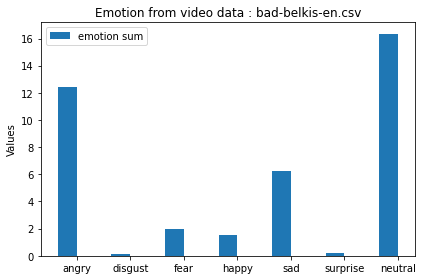

Top emotion :  bad


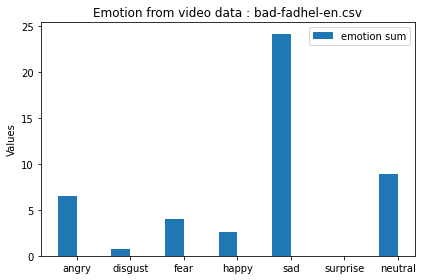

Top emotion :  bad


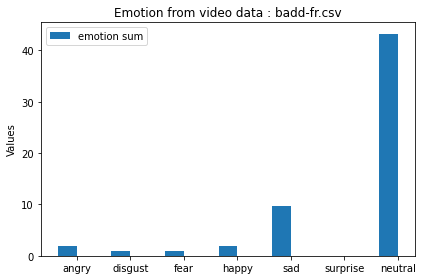

Top emotion :  good


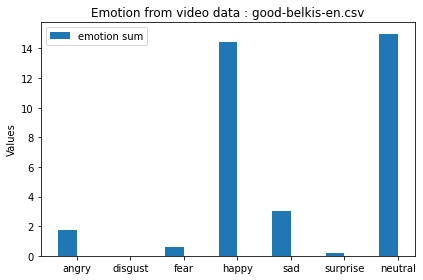

Top emotion :  good


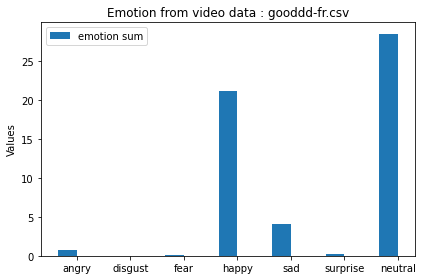

,name,video,text,audio


In [5]:
arr = os.listdir('results/data')
labels = ["angry",  "disgust" , "fear" , "happy"  , "sad" , "surprise" , "neutral"]
for d in arr:
    df=pd.read_csv('results/data/'+d)
    df=df.iloc[:,2:]#2 excess cols
    
    
    
    men_means = [sum(df.iloc[:,0]),sum(df.iloc[:,1]), sum(df.iloc[:,2]), sum(df.iloc[:,3]),
                 sum(df.iloc[:,4]), sum(df.iloc[:,5]),sum(df.iloc[:,6])]
    
    s_bad=sum(df.iloc[:,0])+sum(df.iloc[:,1])+ sum(df.iloc[:,2])+sum(df.iloc[:,4])
    s_good=sum(df.iloc[:,3])+sum(df.iloc[:,5])
    
    emotion_video= 'good' if s_good > s_bad   else 'bad'
    x = np.arange(len(labels))  # the label locations
    width = 0.35  # the width of the bars

    fig, ax = plt.subplots()
    rects1 = ax.bar(x - width/2, men_means, width, label='emotion sum')
    

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel('Values')
    ax.set_title('Emotion from video data : '+d)
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    ax.legend()

    

    fig.tight_layout()
    print('Top emotion : ',emotion_video)
    videos.append(emotion_video)
    plt.show()

data_emotion.head()

In [6]:
from textblob import TextBlob
from textblob_fr import PatternTagger, PatternAnalyzer
from langdetect import detect,lang_detect_exception


file :  bad-belkis-en.txt
Positive_feebacks Count : 2
['My operator is only do', ' I do not like it']
Negative_feedback Count : 0
[]
Emotion from text : good


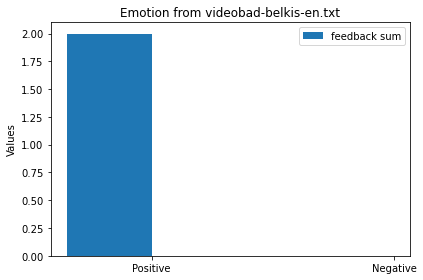

file :  bad-fadhel-en.txt
Positive_feebacks Count : 1
['Talk']
Negative_feedback Count : 0
[]
Emotion from text : good


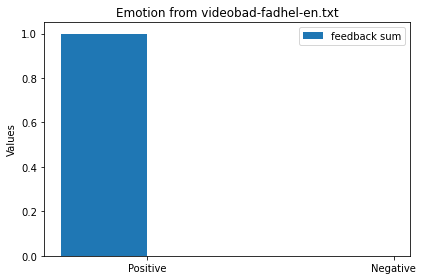

file :  badd-fr.txt
Positive_feebacks Count : 1
['Je déteste mon opérateur']
Negative_feedback Count : 1
[" Il me fait chier vraiment cette fois c'est très très mal"]
Emotion from text : good


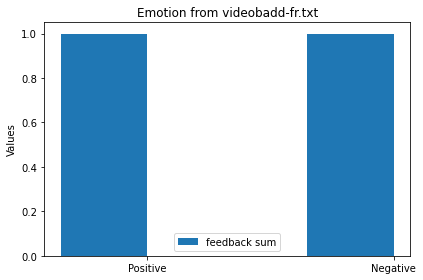

file :  good-belkis-en.txt
Positive_feebacks Count : 2
['My operator is greedo', ' I like it']
Negative_feedback Count : 0
[]
Emotion from text : good


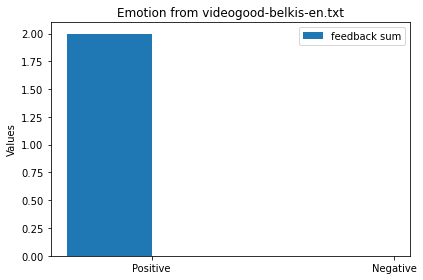

file :  gooddd-fr.txt
Positive_feebacks Count : 3
['Mon opérateur offre de très bons services', " Je l'aime trop", " C'est très très bien"]
Negative_feedback Count : 0
[]
Emotion from text : good


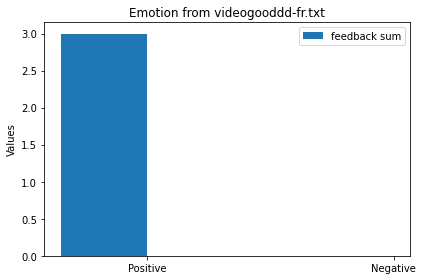

In [7]:
arr = os.listdir('results/text')
labels=['Positive','Negative']
for txt in arr:
    print('file : ',txt)
    s=[]
    positive_feedbacks=[]
    negative_feedbacks=[]
    f = open('results/text//'+txt, "r")
    s=f.read()
    s=s.split('.')
    #print(s)
    






    for feedback in s:

        try:
            if(detect(feedback)=='en'):

                feedback_polarity = TextBlob(feedback).sentiment.polarity
            else:
                feedback_polarity=TextBlob(feedback, pos_tagger=PatternTagger(), analyzer=PatternAnalyzer()).sentiment[0]
            if feedback_polarity>=0:
                positive_feedbacks.append(feedback)
                continue

            negative_feedbacks.append(feedback)
        except :
            continue

    print('Positive_feebacks Count : {}'.format(len(positive_feedbacks)))
    print(positive_feedbacks)
    print('Negative_feedback Count : {}'.format(len(negative_feedbacks)))
    print(negative_feedbacks)
    men_means = [len(positive_feedbacks),len(negative_feedbacks)]
    

    x = np.arange(2)  # the label locations
    width = 0.35  # the width of the bars

    fig, ax = plt.subplots()
    rects1 = ax.bar(x - width/2, men_means, width, label='feedback sum')
    

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel('Values')
    ax.set_title('Emotion from video'+txt)
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    ax.legend()

    emotion_text= 'good' if len(positive_feedbacks)>=len(negative_feedbacks) else 'bad'
    print('Emotion from text :',emotion_text)
    texts.append(emotion_text)
    fig.tight_layout()
    plt.show()
    
    
    

In [8]:
import pickle
import librosa as lb
import soundfile as sf
Pkl_Filename="Sound_Model.pkl"
with open(Pkl_Filename, 'rb') as file:  
    Pickled_LR_Model = pickle.load(file)

Pickled_LR_Model

MLPClassifier(hidden_layer_sizes=(200,), max_iter=400)

In [9]:
def audio_features(file_title, mfcc, chroma, mel):
    with sf.SoundFile(file_title) as audio_recording:
        audio = audio_recording.read(dtype="float32")
        sample_rate = audio_recording.samplerate
        
        if chroma:
            stft=np.abs(lb.stft(audio))
            result=np.array([])
        if mfcc:
            mfccs=np.mean(lb.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40).T, axis=0)
            result=np.hstack((result, mfccs))
        if chroma:
            chroma=np.mean(lb.feature.chroma_stft(S=stft, sr=sample_rate).T,axis=0)
            result=np.hstack((result, chroma))
        if mel:
            mel=np.mean(lb.feature.melspectrogram(audio, sr=sample_rate).T,axis=0)
            result=np.hstack((result, mel))
        return result

In [10]:

arr = os.listdir('results/audio')
labels = ["happy/neutral","bad"]

for d in arr:
    feature = audio_features('results//audio//'+d, mfcc=True, chroma=True, mel=True)
    emotion_audio=str(Pickled_LR_Model.predict(feature.reshape(1,-1))[0])
    print('file : '+d+' emotion from sound : '+ emotion_audio)
    audios.append(emotion_audio)


file : bad-belkis-en.wav emotion from sound : bad
file : bad-fadhel-en.wav emotion from sound : good
file : badd-fr.wav emotion from sound : bad
file : good-belkis-en.wav emotion from sound : bad
file : gooddd-fr.wav emotion from sound : bad


In [11]:
data_emotion['name']=names
data_emotion['video']=videos

data_emotion['text']=texts
data_emotion['audio']=audios
data_emotion.head()

,name,video,text,audio
0,bad-belkis-en,bad,good,bad
1,bad-fadhel-en,bad,good,good
2,badd-fr,bad,good,bad
3,good-belkis-en,good,good,bad
4,gooddd-fr,good,good,bad


video


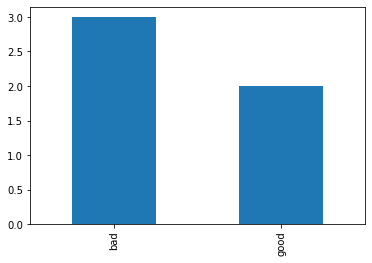

text


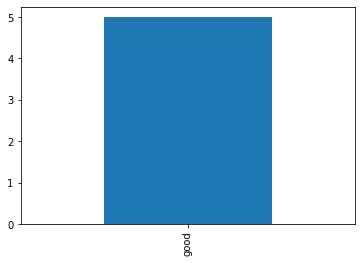

audio


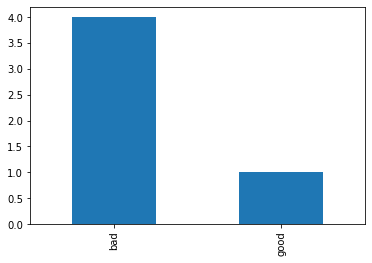

In [12]:
for col in data_emotion.columns[1:]:
    print(col)
    data_emotion[col].value_counts().plot(kind='bar')
    plt.show()